<a href="https://colab.research.google.com/github/hirotakaster/imagesearch/blob/main/nns_feature_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徴マップ可視化
Conv2D Feature Map

In [1]:
!pip install torchinfo
!git clone https://github.com/hirotakaster/imagesearch

Cloning into 'imagesearch'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 149 (delta 5), reused 132 (delta 0), pack-reused 0
Receiving objects: 100% (149/149), 60.10 MiB | 13.90 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
# 画像表示用
import cv2
import matplotlib.pyplot as plt

def show_image_files(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, f in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB))

In [3]:
import torch
import matplotlib.pyplot as plt
import glob
import cv2
import os
from torchvision import transforms
from PIL import Image
from IPython.display import display
from torchinfo import summary
from torchvision import models
import numpy as np

modelresnet = models.resnet50(pretrained=True)
print (modelresnet)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

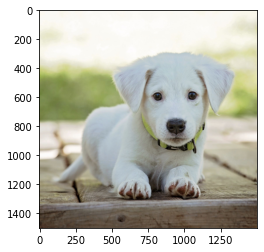

torch.Size([1, 3, 224, 224])


In [4]:
img=cv2.imread("imagesearch/data/test/008.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
 
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img=np.array(img)
img=transform(img)
img=img.unsqueeze(0)
print(img.size())

In [5]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

no_of_layers=0
conv_layers=[]
 
model_children=list(modelresnet.children())
 
for child in model_children:
  if type(child)==nn.Conv2d:
    no_of_layers+=1
    conv_layers.append(child)
  elif type(child)==nn.Sequential:
    for l1 in child.children():
      for l2 in l1.children():
        if type(l2)==nn.Conv2d:
          no_of_layers+=1
          conv_layers.append(l2)
print(no_of_layers)

49


In [6]:
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results


layer: 0
64


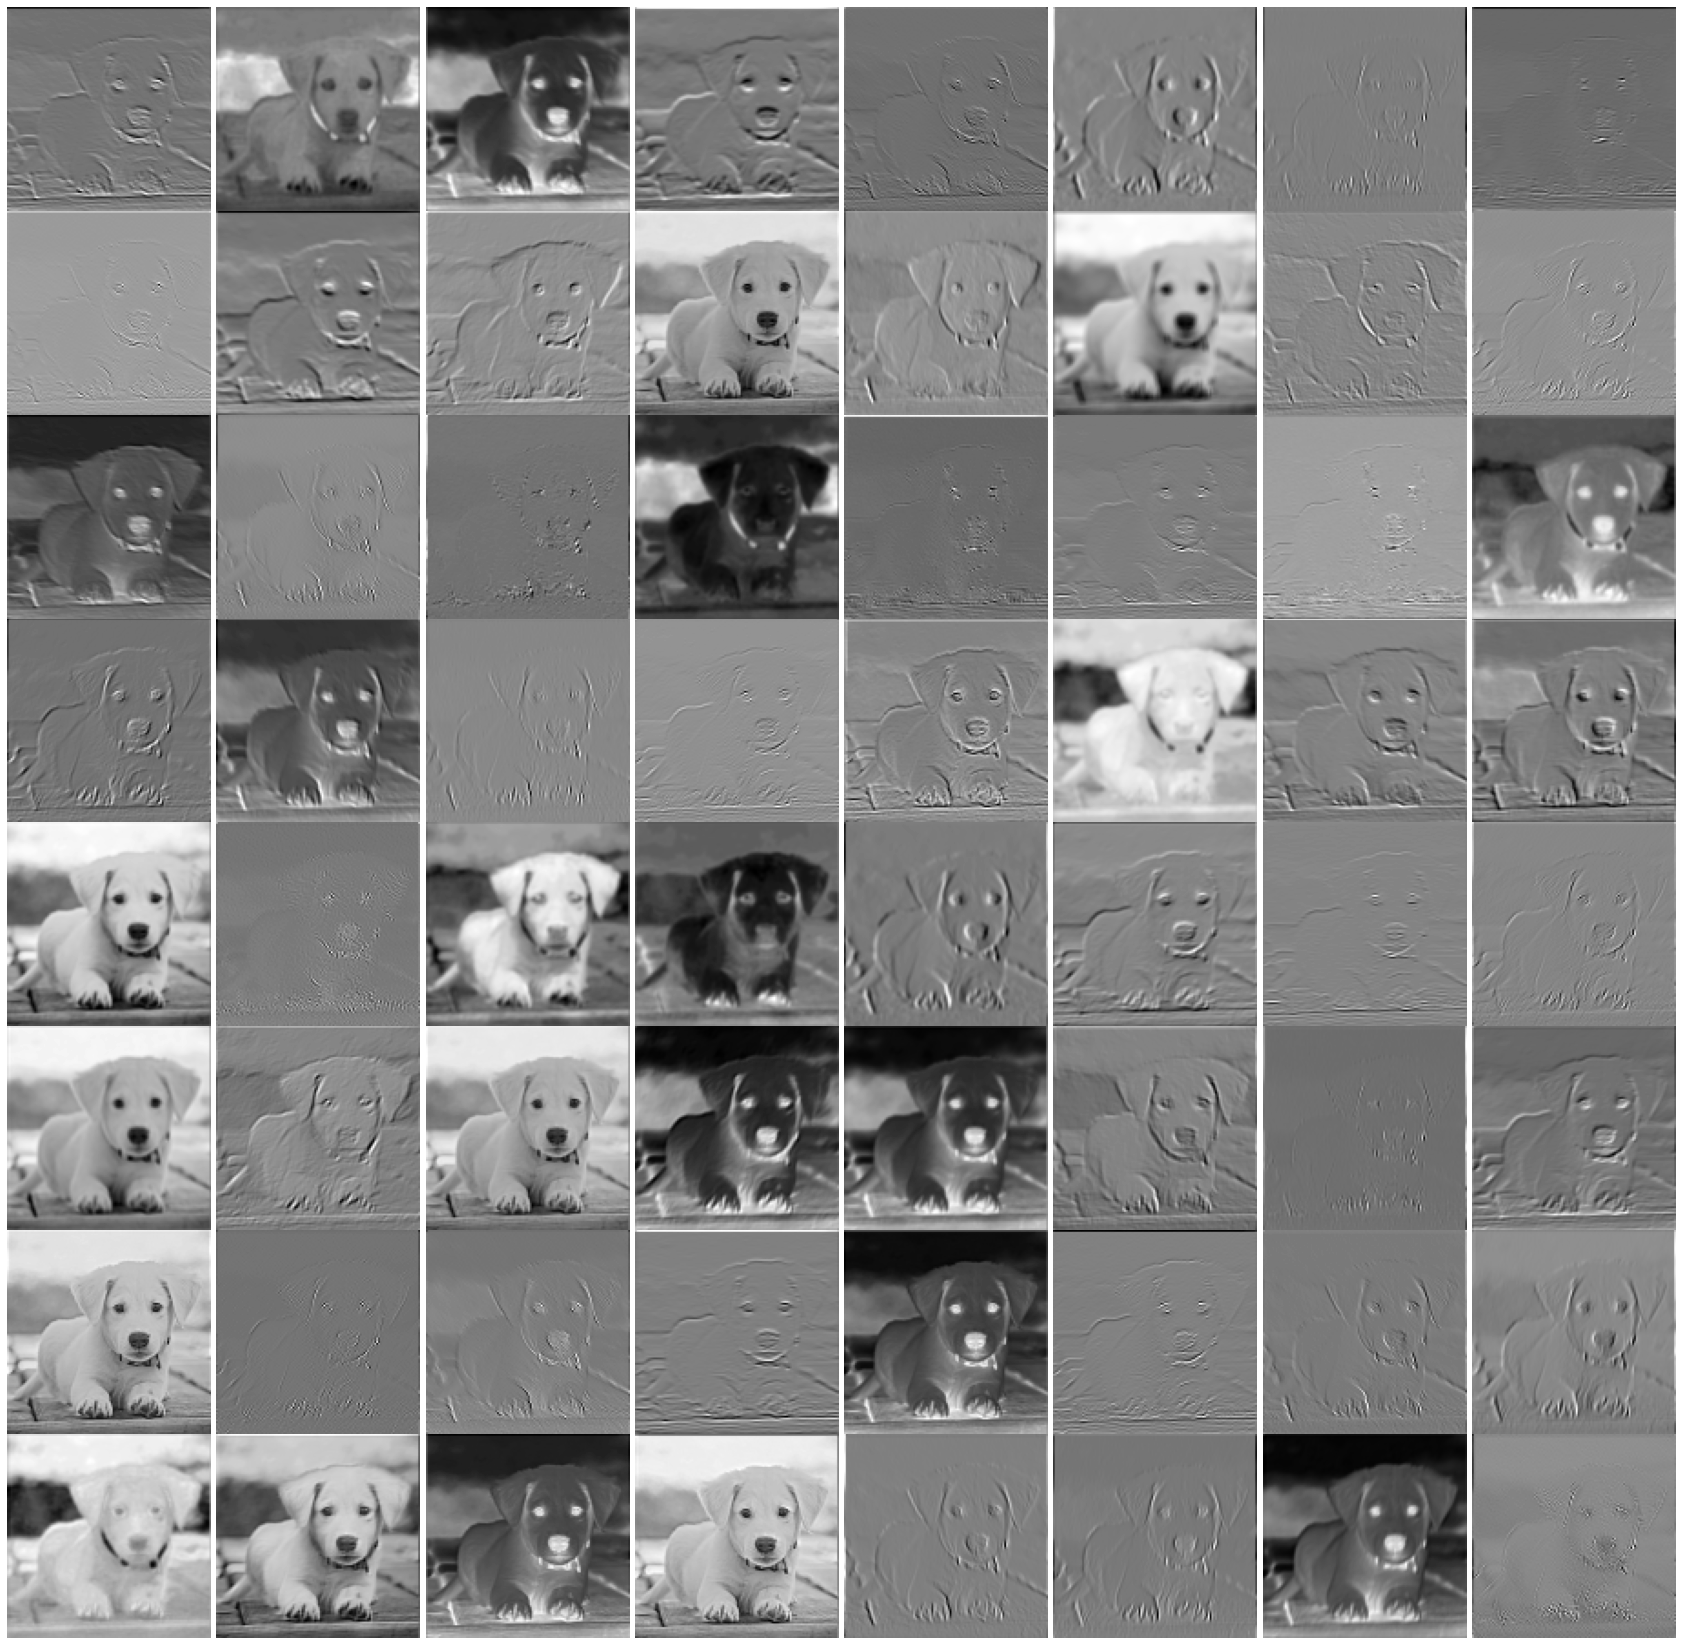

layer: 1
2048


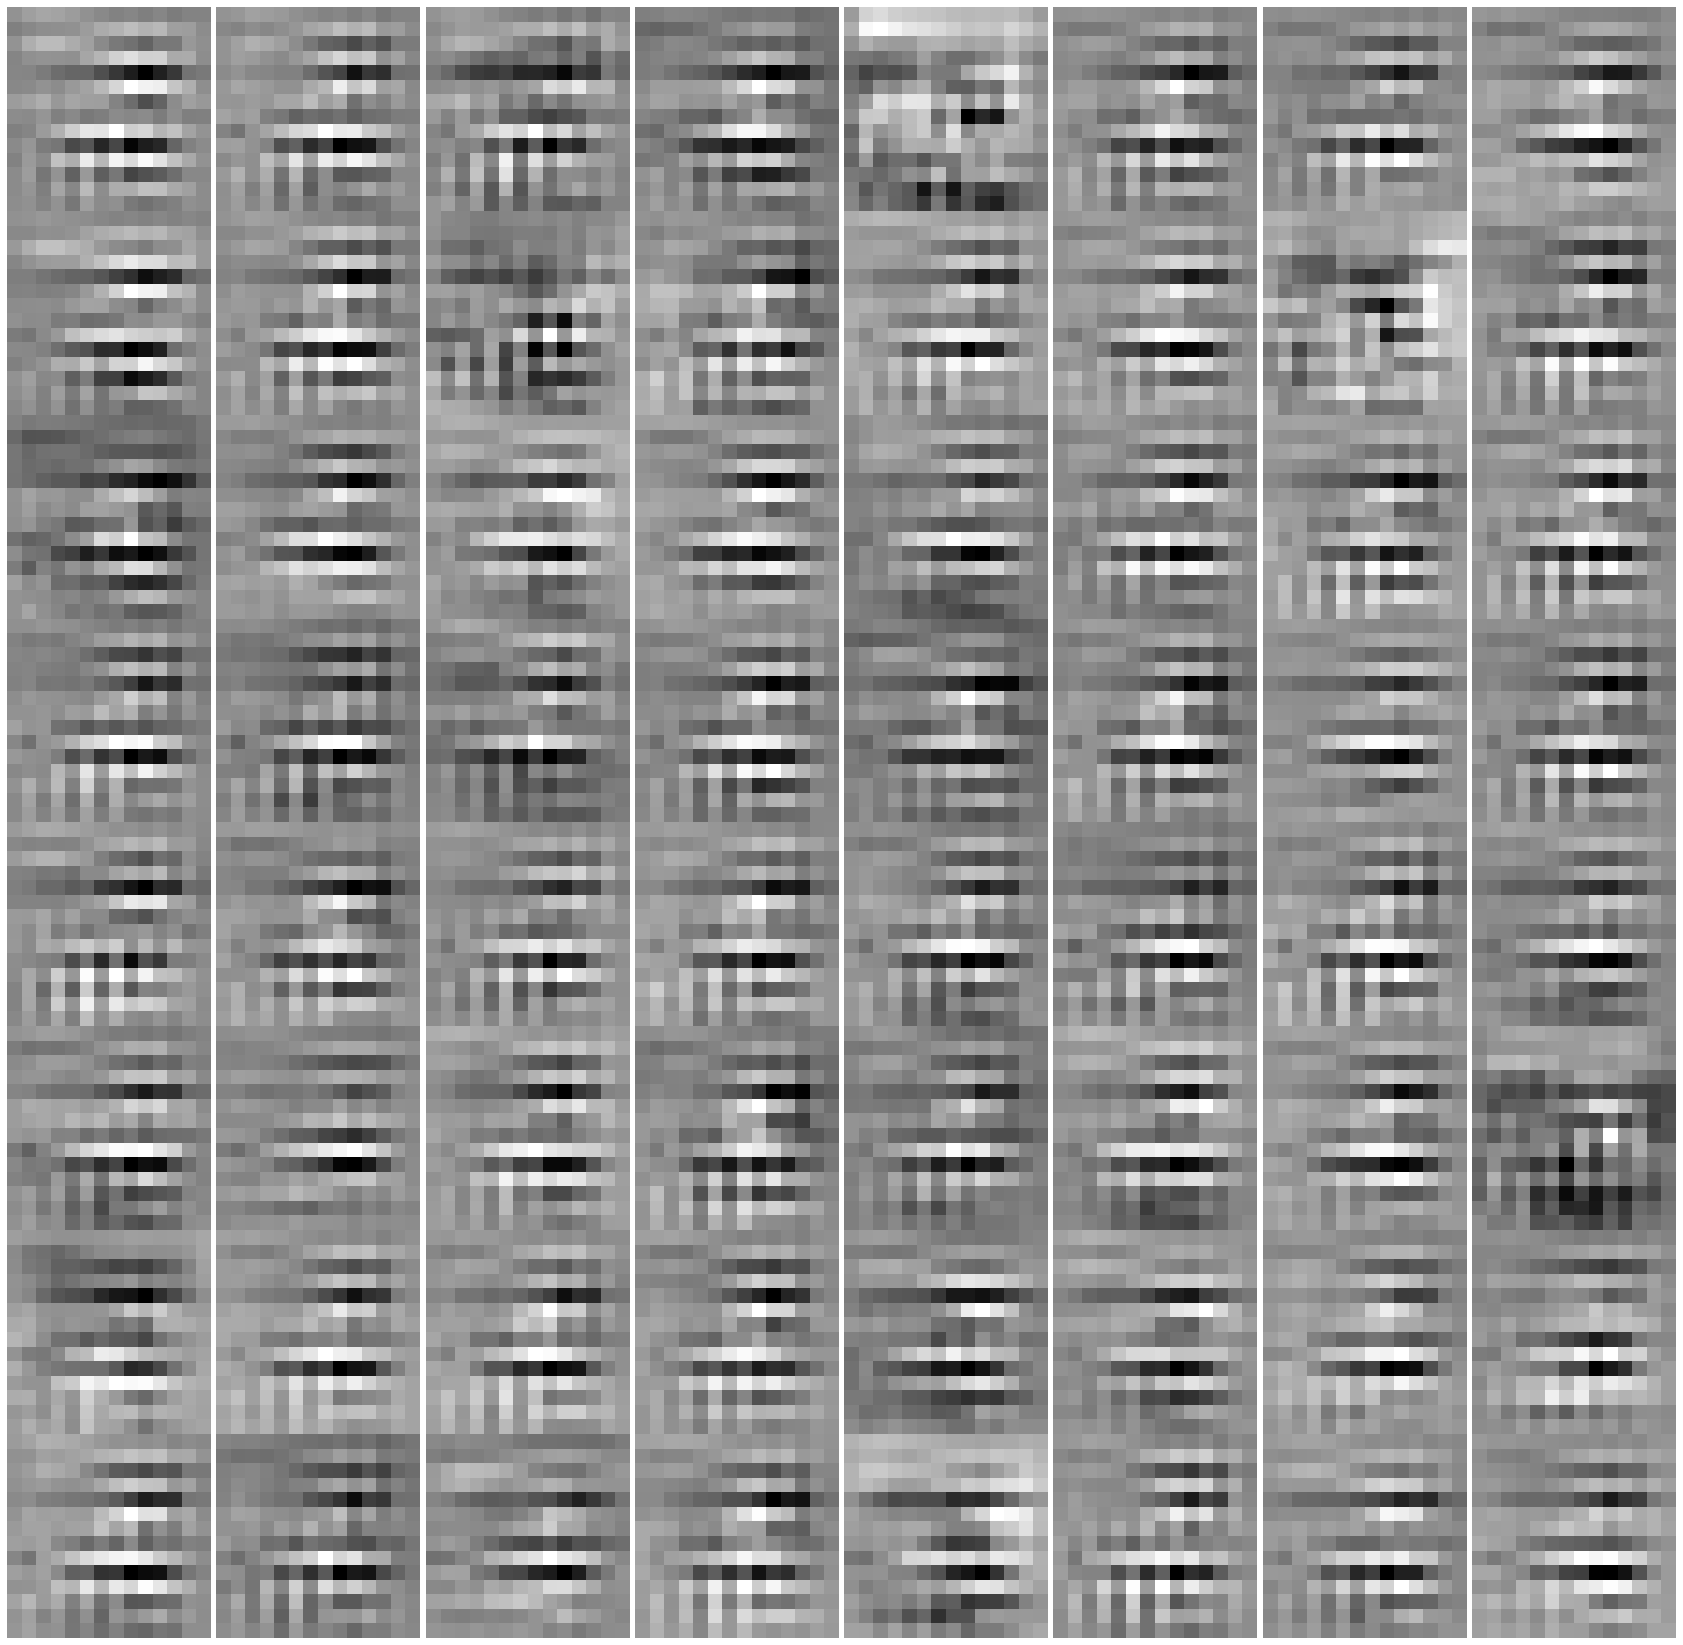

In [10]:
# get 1st and last feature map.
for idx, layer in enumerate(outputs[::len(outputs)-1]):
    plt.figure(figsize=(30, 30))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    layer_viz = layer[0, :, :, :]
    layer_viz = layer_viz.data
    print ('layer: ' + str(idx))
    print (len(layer_viz))
    for i, filter in enumerate(layer_viz):
        if i == 64: 
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    plt.show()
    plt.close()
